In [217]:
#| include: false

%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer
import torch
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Link to logistic regression implementation: [logistic.py](https://github.com/vikramv17/vikramv17.github.io/blob/main/posts/implementing-logistic_regression/logistic.py)

# Abstract
This blog post attempts to implement a simple logistic regression algorithm for binary classification. The logistic regression algorithm is a supervised learning algorithm that is used for binary classification problems. It is a linear model that uses the logistic function to model the probability of a binary outcome. The logistic function is an S-shaped curve that maps any real-valued number into the range of 0 to 1. The logistic regression algorithm uses gradient descent to optimize the weights of the model. After implementing the algorithm, we will test it on a few datasets and visualize the results. 

# Implement Logistic Regression
## Understanding perceptron.grad()
To implement the logistic regression algorithm we will use the basic Linear Model to score and predict the data. From there, the LogisticRegression.loss() function computes the scores and uses the sigmoid function to transform the scores into probabilities. The loss function is then computed using the logistic loss function for empirical risk minimization. LogisticRegression.grad() computes the gradient of the loss function with respect to the weights. The gradient is then used to update the weights using gradient descent as done in GradientDescentOptimizer.step(). The learning rate (alpha) is a hyperparameter that controls the step size of the weight updates and beta controls the momentum.

# Experiments
To test our logistic regression we will run some experiments and create visualizations. In order to do this we will need to make datasets to test on. We will use the classification_data function to quickly make random datasets with the desired number of dimensions. We also define a couple of graphing functions that will help us to plot the perceptron data along with the calculated thresholds.

In [237]:
plt.style.use('seaborn-v0_8-whitegrid')
torch.manual_seed(1234567)

def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

def plot_logistic_regression_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = 2*y[ix]-1, facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

## Vanilla Gradient Descent
To first check that our logistic regression implementation is working we will run it on a simple dataset with two dimensions without using momentum. A beta value of 0 should have the same effect as gradient descent without momentum, so we will test that by setting beta to 0. We will iterate 500 times to see how the loss changes over time and plot the final decision boundary. If the loss decreases monotonically, then we can be sure that our implementation is correct.

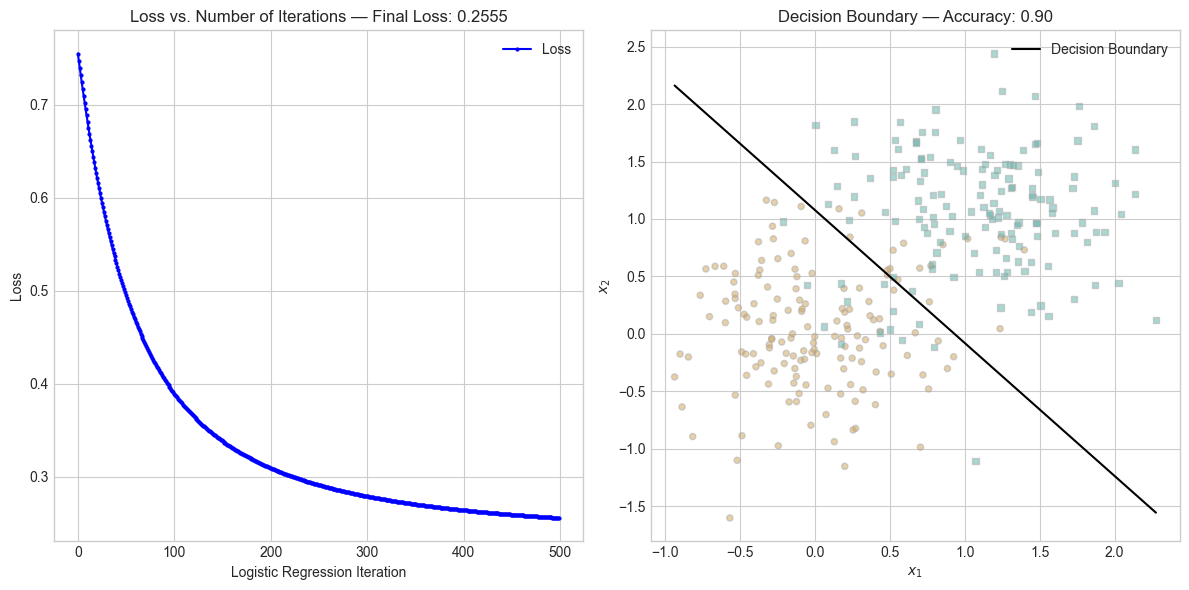

In [240]:
X, y = classification_data(noise = 0.5)

LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss = 1.0

loss_vec = []

for _ in range(500):
    loss = LR.loss(X, y)
    loss_vec.append(loss) 
    opt.step(X, y, alpha = 0.1, beta = 0)

scores = LR.score(X)
probs = LR.sigmoid(scores)
predictions = (probs >= 0.5).float()
accuracy = (predictions == y).float().mean().item()
final_loss = LR.loss(X, y)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(loss_vec, marker='o', color='blue', label='Loss', markersize=2)
axes[0].set_xlabel('Logistic Regression Iteration')
axes[0].set_ylabel('Loss')
axes[0].set_title(f'Loss vs. Number of Iterations — Final Loss: {final_loss:.4f}')
axes[0].grid(True)
axes[0].legend()

plot_logistic_regression_data(X, y, axes[1])
draw_line(LR.w, X[:, 0].min(), X[:, 0].max(), axes[1], color="black", label="Decision Boundary")
axes[1].set_title(f'Decision Boundary — Accuracy: {accuracy:.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()


As we can see in the above plot, the perceptron algorithm is able to correctly work its way to a loss of zero indicating to us that the algorithm is working as intended.

## Benefits of Momentum
The first experiment involves linearly separable 2-dimensional data. We will create a dataset with 50 points and plot it as shown below.

With this data we will run our algorithm and visualize the results. We will plot the data and the decision boundary along with the previous decision boundary as the iterations continue to improve the loss. To perform the training we are selecting a random point and seeing if it was misclassified. If it was we call the step function to update the weights. The loop stops when the loss is zero indicating that the data has been completely separated by the threshold.

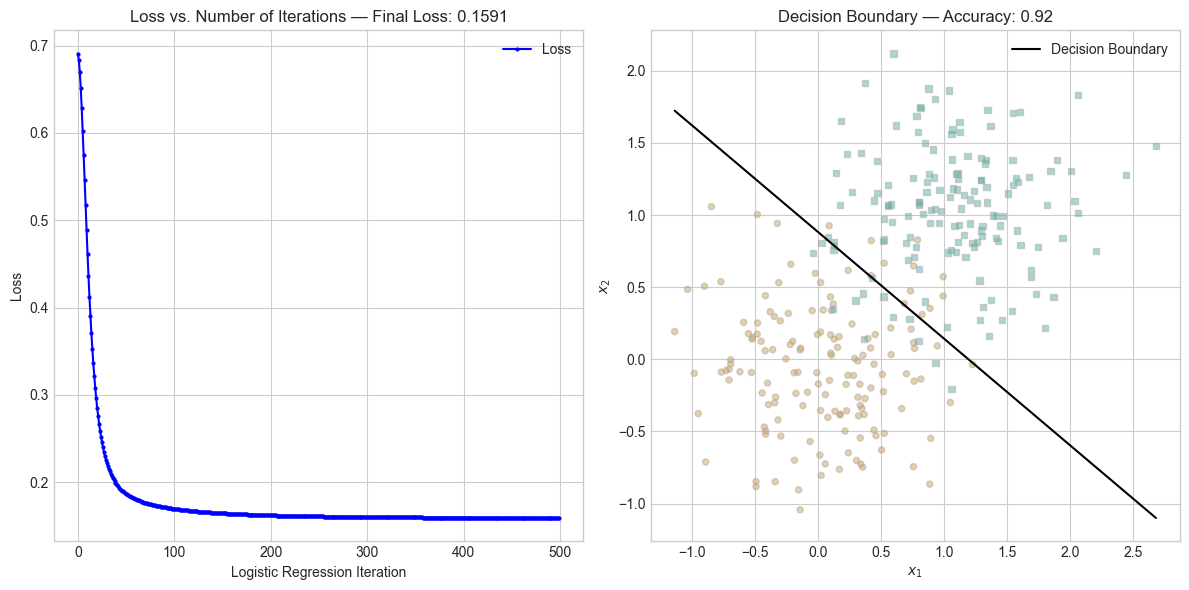

In [ ]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss = 1.0

loss_vec = []

for _ in range(500):
    loss = LR.loss(X, y)
    loss_vec.append(loss) 
    opt.step(X, y, alpha = 0.1, beta = 0.9)

scores = LR.score(X)
probs = LR.sigmoid(scores)
predictions = (probs >= 0.5).float()
accuracy = (predictions == y).float().mean().item()
final_loss = LR.loss(X, y)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(loss_vec, marker='o', color='blue', label='Loss', markersize=2)
axes[0].set_xlabel('Logistic Regression Iteration')
axes[0].set_ylabel('Loss')
axes[0].set_title(f'Loss vs. Number of Iterations — Final Loss: {final_loss:.4f}')
axes[0].grid(True)
axes[0].legend()

plot_logistic_regression_data(X, y, axes[1])
draw_line(LR.w, X[:, 0].min(), X[:, 0].max(), axes[1], color="black", label="Decision Boundary")
axes[1].set_title(f'Decision Boundary — Accuracy: {accuracy:.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

As we can see, the algorithm works from a random guess to a threshold that perfectly separates the data. The final plot shows this separation and the loss of zero confirms that the data has been completely separated.

## Overfitting
The second experiment involves 2-dimensional data that is not linearly separable. We will create a dataset with 50 points and plot it as shown below to confirm that it is not linearly separable.

In [206]:
X_train, y_train = classification_data(n_points=50, noise=0.5, p_dims=100)
X_test, y_test = classification_data(n_points=50, noise=0.5, p_dims=100)

LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)

loss_vec = []
for _ in range(1000):
    loss = LR.loss(X_train, y_train)
    loss_vec.append(loss.item())
    opt.step(X_train, y_train, alpha=0.1, beta=0.9)

scores_train = LR.score(X_train)
probs_train = LR.sigmoid(scores_train)
predictions_train = (probs_train >= 0.5).float()
accuracy_train = (predictions_train == y_train).float().mean().item()

scores_test = LR.score(X_test)
probs_test = LR.sigmoid(scores_test)
predictions_test = (probs_test >= 0.5).float()
accuracy_test = (predictions_test == y_test).float().mean().item()

print(f"Training Accuracy: {accuracy_train:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.80


## Performance ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍on ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍Empirical ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍Data

Since the data cannot be perfectly separated, the algorithm will run forever and never reach zero loss. To rectify this we will limit the algorithm to 1000 iterations and plot the final result along with some intermediate results.

In [278]:
df = pd.read_csv("data/weather.csv")

# limit to just Medu, Fedu, and G3
df = df[["HEATHROW_precipitation", "HEATHROW_sunshine", "HEATHROW_cloud_cover"]]

df_train, df_test = train_test_split(df, test_size=0.6, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.5, random_state=42)
X_train = df_train[["HEATHROW_precipitation", "HEATHROW_cloud_cover"]].values
y_train = df_train["HEATHROW_sunshine"].values
X_val = df_val[["HEATHROW_precipitation", "HEATHROW_cloud_cover"]].values
y_val = df_val["HEATHROW_sunshine"].values
X_test = df_test[["HEATHROW_precipitation", "HEATHROW_cloud_cover"]].values
y_test = df_test["HEATHROW_sunshine"].values
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
X_train = torch.cat([X_train, torch.ones((X_train.size(0), 1))], dim=1)
X_val = torch.cat([X_val, torch.ones((X_val.size(0), 1))], dim=1)
X_test = torch.cat([X_test, torch.ones((X_test.size(0), 1))], dim=1)
y_train = (y_train > 1).float()
y_val = (y_val > 1).float()
y_test = (y_test > 1).float()

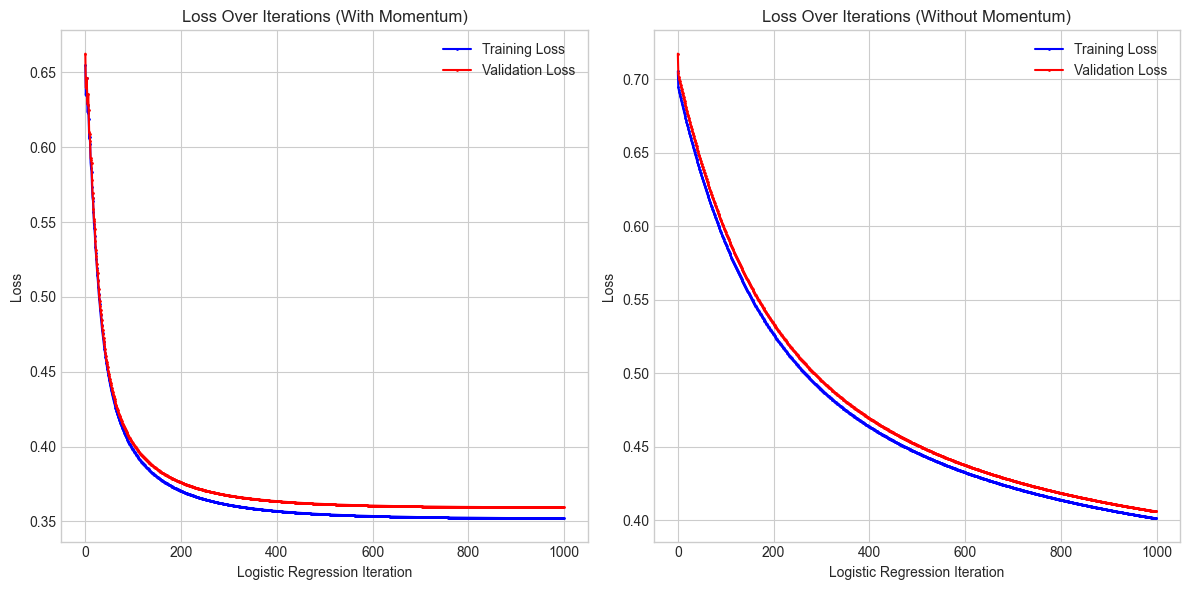

Test Accuracy (With Momentum): 0.84
Final Loss (With Momentum): 0.3487


In [293]:
LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)
LR2 = LogisticRegression()
opt2 = GradientDescentOptimizer(LR2)

loss_vec_momentum = []
loss_vec_momentum_val = []
loss_vec_no_momentum = []
loss_vec_no_momentum_val = []
loss = 1.0
loss2 = 1.0

for _ in range(1000):
    loss = LR.loss(X_train, y_train)
    loss_val = LR.loss(X_val, y_val)
    loss_vec_momentum.append(loss.item())
    loss_vec_momentum_val.append(loss_val.item())
    opt.step(X_train, y_train, alpha=0.1, beta=0.9)

    loss2 = LR2.loss(X_train, y_train)
    loss_val2 = LR2.loss(X_val, y_val)
    loss_vec_no_momentum.append(loss2.item())
    loss_vec_no_momentum_val.append(loss_val2.item())
    opt2.step(X_train, y_train, alpha=0.1, beta=0)

scores_val = LR2.score(X_val)
probs_val = LR2.sigmoid(scores_val)
predictions_val = (probs_val >= 0.5).float()
accuracy_val = (predictions_val == y_val).float().mean().item()
final_loss_val = LR2.loss(X_val, y_val)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(loss_vec_momentum, marker='o', color='blue', label='Training Loss', markersize=1)
axes[0].plot(loss_vec_momentum_val, marker='o', color='red', label='Validation Loss', markersize=1)
axes[0].set_xlabel('Logistic Regression Iteration')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Over Iterations (With Momentum)')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(loss_vec_no_momentum, marker='o', color='blue', label='Training Loss', markersize=1)
axes[1].plot(loss_vec_no_momentum_val, marker='o', color='red', label='Validation Loss', markersize=1)
axes[1].set_xlabel('Logistic Regression Iteration')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss Over Iterations (Without Momentum)')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

scores_test = LR.score(X_test)
probs_test = LR.sigmoid(scores_test)
predictions_test = (probs_test >= 0.5).float()
accuracy_test = (predictions_test == y_test).float().mean().item()
final_loss_test = LR.loss(X_test, y_test)
print(f"Test Accuracy (With Momentum): {accuracy_test:.2f}")
print(f"Final Loss (With Momentum): {final_loss_test:.4f}")

As we see in the plot, the algorithm ran until the maximum number of iterations and the final result has a loss greater than zero. The algorithm was unable to perfectly separate the data as expected. That said, its final result is still a better decision boundary than its initial guess indicating that it was still able to learn and improve.

## Experiment 3
The final experiment involves linearly separable 5-dimensional data. We will create a dataset with 50 points but we cannot plot it due to the high dimensionality. We will run the algorithm and plot the loss over time to see how it converges by plotting the loss over time.